In [1]:
from token_shap import TokenSHAP

In [2]:
model_name = "llama3"
tokenizer_path = "NousResearch/Hermes-2-Theta-Llama-3-8B"
ollama_api_url = "http://localhost:11434"  # Default Ollama API URL
tshap = TokenSHAP(model_name, ollama_api_url, tokenizer_path)

/opt/anaconda3/envs/opensora/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Single Sample

In [3]:
%%time
prompt = "why is the sky blue?"
results = tshap.analyze(prompt, sampling_ratio = 0.2)

CPU times: user 549 ms, sys: 131 ms, total: 681 ms
Wall time: 2min 30s


In [4]:
tshap.shapley_values

{'why': 0.18204324190217022,
 'is': 0.17608648992474407,
 'the': 0.18921444546988925,
 'sky': 0.22157071867755612,
 'blue': 0.2310851040256403,
 '?': 0.0}

In [5]:
results

,Prompt,Response,Cosine_Similarity
0,is the sky blue?,A question that has sparked debate and discuss...,0.529538
1,why the sky blue?,What a great question!\n\nThe sky appears blue...,0.777138
2,why is sky blue?,What a great question!\n\nThe color of the sky...,0.769663
3,why is the blue?,A question that gets to the heart of things!\n...,0.616590
4,why is the sky?,What a profound question!\n\nThe short answer ...,0.687194
5,why is the sky blue,The color of the sky appears blue to our eyes ...,0.750652
6,the sky,"The sky!\n\n* A vast expanse of blue, with onl...",0.280887
7,why sky blue?,"The choice of ""sky blue"" as the name for a col...",0.388215
8,why sky blue,"What a great question!\n\nThe color ""Sky Blue""...",0.415456
9,is blue?,A classic question!\n\nBlue is a color that is...,0.366573


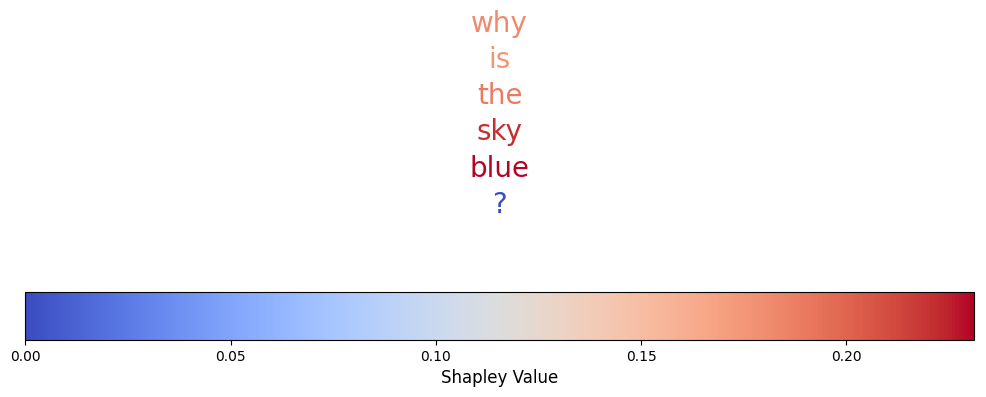

In [6]:
tshap.plot_colored_text()

In [7]:
tshap.print_colored_text()

why is the sky blue ? 


In [8]:
prompt = 'Complete the following code: def quick_sort(arr):'
results = tshap.analyze(prompt, sampling_ratio = 0.2, splitter = ' ')

In [9]:
tshap.shapley_values

{'Complete': 0.10071667268411773,
 'the': 0.028320872818788326,
 'following': 0.0,
 'code:': 0.2644694194518818,
 'def': 0.03801919899459147,
 'quick_sort(arr):': 0.5684738360506207}

In [10]:
tshap.print_colored_text()

Complete the following code: def quick_sort(arr): 


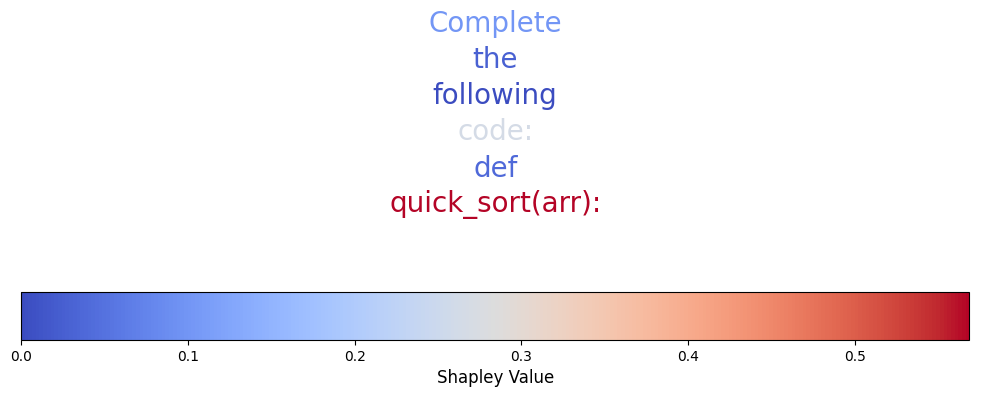

In [11]:
tshap.plot_colored_text()

## Multiple Samples

In [26]:
prompt = "Hello!\nCould you clarify the meaning of existence?\nI'm interested in the philosophical perspective.\nThank you, and have a wonderful day!"
results = tshap.analyze(prompt, splitter ='\n', sampling_ratio = 0.2)

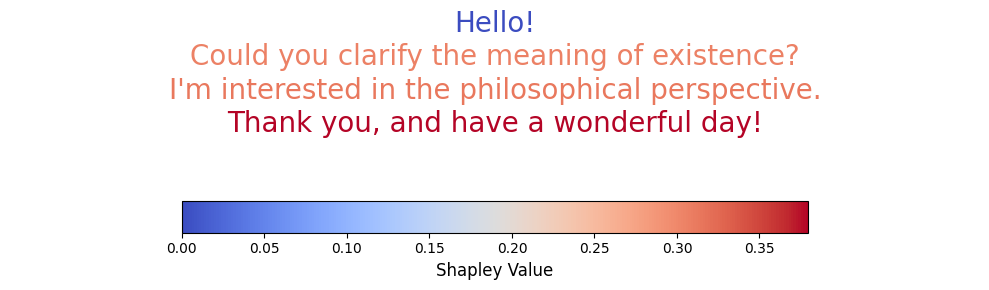

In [27]:
tshap.plot_colored_text()

In [28]:
tshap.print_colored_text()

Hello! Could you clarify the meaning of existence? I'm interested in the philosophical perspective. Thank you, and have a wonderful day! 


In [29]:
tshap.shapley_values

{'Hello!': 0.0,
 'Could you clarify the meaning of existence?': 0.3065520243911907,
 "I'm interested in the philosophical perspective.": 0.31399819854302335,
 'Thank you, and have a wonderful day!': 0.379449777065786}

In [30]:
results

,Prompt,Response,Cosine_Similarity
0,Could you clarify the meaning of existence?\nI...,"What a profound question!\n\nIn philosophy, th...",0.690574
1,Hello!\nI'm interested in the philosophical pe...,A perfect pairing! I'd be delighted to explore...,0.387309
2,Hello!\nCould you clarify the meaning of exist...,What a profound question!\n\nThe concept of ex...,0.651389
3,Hello!\nCould you clarify the meaning of exist...,A profound and timeless question!\n\nThe conce...,0.681218
